## Background


The goal of this project is to train a multi-objective image classifier using data from [Kaggle](https://www.kaggle.com/jangedoo/utkface-new).

The model should take image as an input and predict the gender and age of the person in the image.

## Import libraries and read in data

In [ ]:
!pip install pytorch_lightning -qqq

     |████████████████████████████████| 800 kB 4.9 MB/s 
     |████████████████████████████████| 512 kB 58.0 MB/s 
     |████████████████████████████████| 125 kB 83.9 MB/s 


In [ ]:
!pip install torchsummaryX wandb --quiet

     |████████████████████████████████| 1.9 MB 4.5 MB/s 
     |████████████████████████████████| 182 kB 78.8 MB/s 
     |████████████████████████████████| 168 kB 13.5 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 168 kB 60.8 MB/s 
     |████████████████████████████████| 166 kB 62.8 MB/s 
     |████████████████████████████████| 166 kB 55.5 MB/s 
     |████████████████████████████████| 162 kB 50.5 MB/s 
     |████████████████████████████████| 162 kB 56.3 MB/s 
     |████████████████████████████████| 158 kB 58.9 MB/s 
     |████████████████████████████████| 157 kB 67.0 MB/s 
     |████████████████████████████████| 157 kB 21.2 MB/s 
     |████████████████████████████████| 157 kB 47.9 MB/s 
     |████████████████████████████████| 157 kB 919 kB/s 
     |████████████████████████████████| 157 kB 61.1 MB/s 
     |████████████████████████████████| 157 kB 56.3 MB/s 
     |████████████████████████████████| 157 kB 72.4 MB/s 
     |████████████

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from typing import List
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import PIL
from PIL import Image, ImageDraw
import torchvision.models as models


import os

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle==1.5.8
!mkdir /root/.kaggle/

with open("/root/.kaggle/kaggle.json", "w+") as f:
    f.write('{"username":"yufanlu0522","key":"ac71488f8e2043dc0bb1f3ac535a7c9c"}') # Put your kaggle username & key here

!chmod 600 /root/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 3.3 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.8-py3-none-any.whl size=73274 sha256=67fcd34fd6ead3652482f9ffc126428b93c0a516c23e29e085e0ae69eb97ea2a
  Stored in directory: /root/.cache/pip/wheels/f3/67/7b/a6d668747974998471d29b230e7221dd01330ac34faebe4af4
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

 95% 314M/331M [00:02<00:00, 109MB/s]
100% 331M/331M [00:02<00:00, 117MB/s]


In [ ]:
!mkdir '/content/data'

!unzip -qo 'utkface-new.zip' -d '/content/data'

In [ ]:
path = "/content/data/UTKFace/"
files = os.listdir(path)
print("Total samples:", len(files))
print(files[0])

Total samples: 23708
5_0_0_20170110213322127.jpg.chip.jpg


We can extract the needed labels (age and gender) from the file names. The first number in the file name is age, the second number is gender (0 for male, 1 for female).

In [ ]:
import random

In [ ]:
import cv2
images = []
ages = []
genders = []
files_1=[]
for file in files:
    image = cv2.imread(path+file,0)
    image = cv2.resize(image,dsize=(124,124))
    image = image.reshape((image.shape[0],image.shape[1],1))
    
    split_var = file.split('_')

    if (int(split_var[0])<80):
      files_1.append(file)
      images.append(image)
      ages.append(split_var[0])
      genders.append(int(split_var[1]) )

    #print(split_var[0])
    # myRandom=random.randint(0, 3)

    # if (int(split_var[0])>55 and int(split_var[0])<75):
    #   files.append(file)
    #   ages.append(split_var[0])
    #   genders.append(int(split_var[1]))



In [ ]:
files_2=[]
for file in files_1:
    image = cv2.imread(path+file,0)
    image = cv2.resize(image,dsize=(124,124))
    image = image.reshape((image.shape[0],image.shape[1],1))
    split_var = file.split('_')


    if (int(split_var[0])>35 and int(split_var[0])<110):
      files_2.append(file)
      images.append(image)
      ages.append(split_var[0])
      genders.append(int(split_var[1]) )
      if (int(split_var[0])>50):
        files_2.append(file)
        images.append(image)
        ages.append(split_var[0])
        genders.append(int(split_var[1]) )

In [ ]:
files_3=[]
for file in files_1:
    image = cv2.imread(path+file,0)
    image = cv2.resize(image,dsize=(124,124))
    image = image.reshape((image.shape[0],image.shape[1],1))
    split_var = file.split('_')


    if (int(split_var[0])<20 or int(split_var[0])>60):
      files_3.append(file)
      images.append(image)
      ages.append(split_var[0])
      genders.append(int(split_var[1]) )

In [ ]:

for file in files_1:
    image = cv2.imread(path+file,0)
    image = cv2.resize(image,dsize=(124,124))
    image = image.reshape((image.shape[0],image.shape[1],1))
    split_var = file.split('_')


    if ((int(split_var[0])<20 and int(split_var[0])>10) or int(split_var[0])>60):
      files_3.append(file)
      images.append(image)
      ages.append(split_var[0])
      genders.append(int(split_var[1]) )
      if (int(split_var[0])>60):
        files_3.append(file)
        images.append(image)
        ages.append(split_var[0])
        genders.append(int(split_var[1]))
        


In [ ]:
files_4=[]
for file in files_1:
    image = cv2.imread(path+file,0)
    image = cv2.resize(image,dsize=(124,124))
    image = image.reshape((image.shape[0],image.shape[1],1))
    split_var = file.split('_')


    if (int(split_var[0])>70):
      files_4.append(file)
      images.append(image)
      ages.append(split_var[0])
      genders.append(int(split_var[1]) )

      files_4.append(file)
      images.append(image)
      ages.append(split_var[0])
      genders.append(int(split_var[1]) )


In [ ]:

files_1.extend(files_2)
files_1.extend(files_3)
files_1.extend(files_4)


Now let's put everything into a dataframe and check for missing values.

In [ ]:
data = {'img_file': files_1, 'gender': genders, 'age': ages}
df = pd.DataFrame(data=data)
df['age'] = df['age'].astype(int)
df.head()

,img_file,gender,age
0,5_0_0_20170110213322127.jpg.chip.jpg,0,5
1,28_0_1_20170116203348523.jpg.chip.jpg,0,28
2,14_1_0_20170109204131257.jpg.chip.jpg,1,14
3,16_0_0_20170116235030195.jpg.chip.jpg,0,16
4,48_0_0_20170117164541702.jpg.chip.jpg,0,48


In [ ]:
df.isnull().sum()

img_file    0
gender      0
age         0
dtype: int64

## EDA & Preprocessing

Let's start with some simpe EDA and preprocessing: look at some of the images, split age into age groups and look at the age and gender distribution.

First, let's create a dictionary for genders where 0 is male, and 1 is female and print some examples.

In [ ]:
gender_map = {
    0: "Male",
    1: "Female"
}

In [ ]:
def show_images(df: pd.DataFrame) -> None:
    fig,ax = plt.subplots(2,5)
    fig.set_size_inches(10, 6)
    k =0
    for i in range(2):
        for j in range(5):
            image = cv2.imread(path+df.img_file[k],0)
            image = cv2.resize(image,dsize=(64,64))
            #image = image.reshape((image.shape[0],image.shape[1],1))
            
            ax[i,j].imshow(image , cmap='gray')
            ax[i,j].set_title(f'{gender_map[df.gender[k]]}, {df.age[k]}')
            k = k+1;
            
    plt.tight_layout()

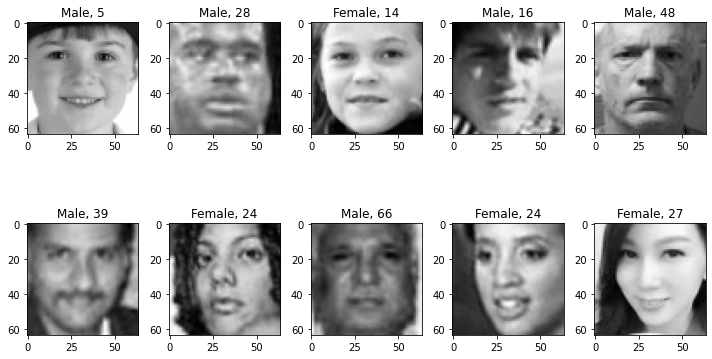

In [ ]:
show_images(df)

From the first look, the training data seems to be quite diverse, as it includes people of different races, genders and ages. Let's see how many samples there are for both genders.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


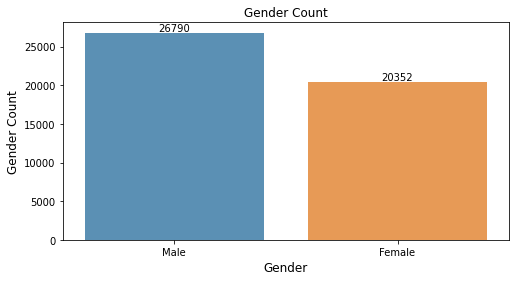

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df.gender, alpha=0.8)
plt.title("Gender Count")
plt.ylabel('Gender Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)

positions = (0, 1)
labels = ("Male", "Female")
plt.xticks(positions, labels)

#adding the text labels
labels = df.gender.value_counts().sort_index()
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

As we can see, the difference between female and male samples is not that big. Let's see how the age distribution looks. First, we need to find the range of ages and split the ages into age bins.

In [ ]:
print("Max age: ", df['age'].max())
print("Min age: ", df['age'].min())

Max age:  79
Min age:  1


In [ ]:
# df['bin'] = pd.cut(df['age'], bins = [0,10,20,30,40,50,60,70,80,90,100,110,120],
#                    labels = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110'])
# df.head()


df['bin'] = pd.cut(df['age'], bins = [0,10,20,30,40,50,60,70,80],
                   labels = ['0', '10', '20', '30', '40', '50', '60', '70'])
df.head()

,img_file,gender,age,bin
0,5_0_0_20170110213322127.jpg.chip.jpg,0,5,0
1,28_0_1_20170116203348523.jpg.chip.jpg,0,28,20
2,14_1_0_20170109204131257.jpg.chip.jpg,1,14,10
3,16_0_0_20170116235030195.jpg.chip.jpg,0,16,10
4,48_0_0_20170117164541702.jpg.chip.jpg,0,48,40


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


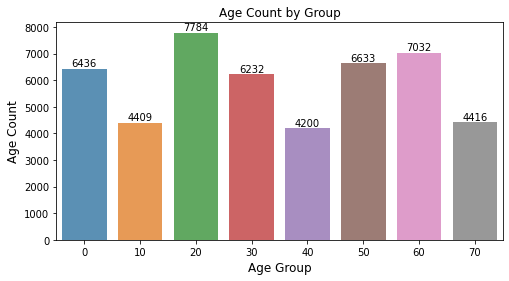

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df.bin, alpha=0.8)
plt.title("Age Count by Group")
plt.ylabel('Age Count', fontsize=12)
plt.xlabel('Age Group', fontsize=12)

#adding the text labels
rects = ax.patches
labels = df.bin.value_counts().sort_index()
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

As we can see, the age classes are more imbalanced. The majority of people are between 20 and 40 years old. There are only 540 people that are older than 80. Let's see if how the age distribution looks for each gender.

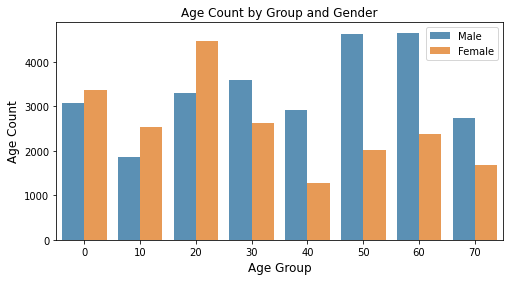

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df.bin, alpha=0.8, hue=df.gender)
plt.title("Age Count by Group and Gender")
plt.ylabel('Age Count', fontsize=12)
plt.xlabel('Age Group', fontsize=12)
plt.legend(labels=["Male","Female"])
plt.show()

As we can see, the majority of people in their 0s,10s and 20s are women and the majority of people older than 30 are men. Let's split the data into train and validation sets

In [ ]:
train, test = train_test_split(files_1, test_size=0.2, random_state=14,shuffle=True)

print("Samples in training set:",len(train))
print("Samples in testing set:",len(test))

Samples in training set: 37713
Samples in testing set: 9429


## Modeling

Now let's define the image transformations (image resize, center crop, normalize, convert to tensor).

In [ ]:
preprocess_train = transforms.Compose([
   transforms.Resize(200),

   torchvision.transforms.RandomHorizontalFlip(p=0.5),
   torchvision.transforms.RandomRotation(20),
   torchvision.transforms.ColorJitter(brightness=0.4, contrast=0.3, saturation=0.3, hue=0.1),

   transforms.ToTensor(),
   transforms.Normalize(
       mean=[0.485, 0.456, 0.406],
       std=[0.229, 0.224, 0.225]
   )
])


preprocess_test = transforms.Compose([
   transforms.Resize(200),

   transforms.ToTensor(),
   transforms.Normalize(
       mean=[0.485, 0.456, 0.406],
       std=[0.229, 0.224, 0.225]
   )
])

Now let's create a custom dataset that applies the transformations to the images and deals with the labels.

In [ ]:
path = "/content/data/UTKFace/"
files = os.listdir(path)
print("Total samples:", len(files))
print(files[3])
split_varr=files[3].split('_')

Total samples: 23708
16_0_0_20170116235030195.jpg.chip.jpg


In [ ]:
split_varr

['16', '0', '0', '20170116235030195.jpg.chip.jpg']

In [ ]:

class MultiTaskDataset(Dataset):
    def __init__(self, path: str, files: list, tfms):
    #def __init__(self, path: str, files: list):
        self.files = files
        self.path = path
        self.tfms = tfms


    def __len__(self): 
        return len(self.files)
    
    def __getitem__(self, idx: int):
        img_file = self.files[idx]
        img = PIL.Image.open(self.path + img_file).convert('RGB')
        img = self.tfms(img)
        
        split_var = self.files[idx].split('_')
        age = int(split_var[0])
        #age = torch.tensor(age, dtype=torch.float32)
        # age = torch.tensor(age, dtype=torch.int64)
        age = torch.tensor(age-1,dtype=torch.int64)
        #gender = torch.tensor(int(split_var[1]), dtype=torch.int64)
        gender = torch.tensor(int(split_var[1]))
        #gender=torch.tensor(gender,dtype=torch.int64)

        #return img, age.log_()/4.75, gender, img_file
        return img, age, gender, img_file


In [ ]:
config = {
    'batch_size': 256, # Increase this if your GPU can handle it.  // i think 512 is best for now, originally 64
    'lr': 0.001,
    'epochs': 150, 
}

In [ ]:
train_ds = MultiTaskDataset(path, train, preprocess_train)
test_ds = MultiTaskDataset(path, test, preprocess_test)

In [ ]:

train_ds[10][1]

tensor(5)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_ds, batch_size = config['batch_size'], 
                                           shuffle = True,num_workers = 2)
#val_loader = torch.utils.data.DataLoader(valid_ds, batch_size = config['batch_size'], 
#                                         shuffle = False, num_workers = 2)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size = config['batch_size'], 
                                          shuffle = True,num_workers = 2)

In [ ]:
#print("Number of classes: ", len(train_dataset.classes))
print("No. of train images: ", train_ds.__len__())
print("Shape of image: ", train_ds[100][0].shape)
print("Batch size: ", config['batch_size'])
print("Train batches: ", train_loader.__len__())
print("Val batches: ", test_loader.__len__())

No. of train images:  37713
Shape of image:  torch.Size([3, 200, 200])
Batch size:  256
Train batches:  148
Val batches:  37


Now we can begin the modeling part. We are going to apply [transfer learning](https://pytorch-lightning.readthedocs.io/en/stable/advanced/transfer_learning.html) using ResNet34. We’ll pack everything in [LightningModule](https://pytorch-lightning.readthedocs.io/en/stable/common/lightning_module.html). This is a multi-task learning task, because we have to predict the age and gender based on the input image. Predicting age is a regression problem with a single output, predicting gender is a classification problem with two outputs. With that in mind, we can create the model.

In [ ]:
# resnet34
# resnet block
class ResBlock(nn.Module):
    def __init__(self, in_channel,out_channel, stride=1, downsample=None):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channel, out_channel, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channel)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channel, out_channel, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channel)
        self.stride = stride
        self.relu2 = nn.ReLU()
        self.downsample = downsample


    def forward(self, x):
        shortcut = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu1(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
          shortcut = self.downsample(x)
        
        out += shortcut
        out = self.relu2(out)

        return out

In [ ]:
from torch.nn.modules.activation import ReLU
class Network_AGE(nn.Module):
    def __init__(self, block, num_classes=116):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False) 
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(3, 2, 1)
        self.in_channel = 64
        self.layer1 = nn.Sequential(
            block(64, 64),
            block(64, 64),
            block(64, 64)
        )       
        self.layer2 = self._make_layer(block, 128, 4, stride=2)
        self.layer3 = self._make_layer(block, 256, 6, stride=2)
        self.layer4 = self._make_layer(block, 512, 3, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))

        self.linear1 = nn.Linear(512, 512)
        self.batch1 = nn.BatchNorm1d(512)
        self.gelu1 = nn.GELU()
        self.linear2 = nn.Linear(512, 512)
        self.batch2 = nn.BatchNorm1d(512)
        self.gelu2 = nn.GELU()
        self.linear3 =nn.Linear(512, 512)
        self.batch3 = nn.BatchNorm1d(512)
        self.gelu3 = nn.GELU()

        self.cls_layer = nn.Linear(512, num_classes)
    
    def _make_layer(self, block, outchannel, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channel != outchannel:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channel, outchannel, 1, stride, bias=False),
                nn.BatchNorm2d(outchannel),
            )
        layers = []
        layers.append(block(self.in_channel, outchannel, stride, downsample))
        self.in_channel = outchannel

        for i in range(1, blocks):
            layers.append(block(self.in_channel, outchannel))
        return nn.Sequential(*layers)

    
    def forward(self, x, return_feats=False):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        x = self.layer4(x)

        x = self.avgpool(x)
        # print(x.shape)
        x = torch.flatten(x, 1)     # convert 1 X 1 to vector
        # print(x.shape)

        x = self.linear1(x)
        x = self.batch1(x)
        x = self.gelu1(x)
        x = self.linear2(x)
        x = self.batch2(x)
        x = self.gelu2(x)
        x = self.linear3(x)
        x = self.batch3(x)
        x = self.gelu3(x)

        x = self.cls_layer(x)

        return x



In [ ]:
from torch.nn.modules.activation import ReLU
class Network_GENDER(nn.Module):
    def __init__(self, block, num_classes=2):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False) # TODO: Conv group 1
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(3, 2, 1)
        self.in_channel = 64
        self.layer1 = nn.Sequential(
            block(64, 64),
            block(64, 64),
            block(64, 64)
        )       
        self.layer2 = self._make_layer(block, 128, 4, stride=2)
        self.layer3 = self._make_layer(block, 256, 6, stride=2)
        #self.linear = nn.Linear(512, 512)
        #self.dropout = nn.Dropout(0.2)
        self.layer4 = self._make_layer(block, 512, 3, stride=2)


        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.cls_layer = nn.Linear(512, num_classes)
    
    def _make_layer(self, block, outchannel, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channel != outchannel:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channel, outchannel, 1, stride, bias=False),
                nn.BatchNorm2d(outchannel),
            )
        layers = []
        layers.append(block(self.in_channel, outchannel, stride, downsample))
        self.in_channel = outchannel

        for i in range(1, blocks):
            layers.append(block(self.in_channel, outchannel))
        return nn.Sequential(*layers)

    
    def forward(self, x, return_feats=False):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        #x = self.linear(x)
        #x = self.dropout(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)     # convert 1 X 1 to vector
        x = self.cls_layer(x)

        return x



In [ ]:
model_age=Network_AGE(ResBlock)
model_age.cuda()
model_gender=Network_GENDER(ResBlock)
model_gender.cuda()

Network_GENDER(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU()
    )
    (1): ResBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU()
      (con

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Device: ", device)

Device:  cuda


In [ ]:
#my model
from torch.nn.modules.flatten import Flatten
from torch.nn.modules.pooling import AdaptiveAvgPool2d
from torch.nn.modules.activation import ReLU
class Network(torch.nn.Module):
    """
    The Very Low early deadline architecture is a 4-layer CNN.

    The first Conv layer has 64 channels, kernel size 7, and stride 4.
    The next three have 128, 256, and 512 channels. Each have kernel size 3 and stride 2.
    
    Think about strided convolutions from the lecture, as convolutioin with stride= 1 and downsampling.
    For stride 1 convolution, what padding do you need for preserving the spatial resolution? 
    (Hint => padding = kernel_size // 2) - Why?)

    Each Conv layer is accompanied by a Batchnorm and ReLU layer.
    Finally, you want to average pool over the spatial dimensions to reduce them to 1 x 1. Use AdaptiveAvgPool2d.
    Then, remove (Flatten?) these trivial 1x1 dimensions away.
    Look through https://pytorch.org/docs/stable/nn.html 
    
    TODO: Fill out the model definition below! 

    Why does a very simple network have 4 convolutions?
    Input images are 224x224. Note that each of these convolutions downsample.
    Downsampling 2x effectively doubles the receptive field, increasing the spatial
    region each pixel extracts features from. Downsampling 32x is standard
    for most image models.

    Why does a very simple network have high channel sizes?
    Every time you downsample 2x, you do 4x less computation (at same channel size).
    To maintain the same level of computation, you 2x increase # of channels, which 
    increases computation by 4x. So, balances out to same computation.
    Another intuition is - as you downsample, you lose spatial information. We want
    to preserve some of it in the channel dimension.
    """

    # def mobilenet_block(x,filters,strides):
    #     x=torch.nn.Conv2d(in_channels=)
      

    def __init__(self, num_classes=116):
        super().__init__()

        self.backbone = torch.nn.Sequential(
 

            torch.nn.Conv2d(in_channels=3,out_channels=64,kernel_size=3,stride=2,padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.GELU(),

            torch.nn.Conv2d(in_channels=64,out_channels=130,kernel_size=3,stride=2,padding=1),
            torch.nn.BatchNorm2d(130),
            torch.nn.GELU(),

            torch.nn.Conv2d(in_channels=130,out_channels=260,kernel_size=3,stride=2,padding=1),
            torch.nn.BatchNorm2d(260),
            torch.nn.GELU(),

            torch.nn.Conv2d(in_channels=260,out_channels=600,kernel_size=3,stride=2),
            torch.nn.BatchNorm2d(600),
            torch.nn.GELU(),

            torch.nn.Conv2d(in_channels=600,out_channels=1000,kernel_size=3,stride=2),
            torch.nn.BatchNorm2d(1000),
            torch.nn.GELU(),

            torch.nn.Conv2d(in_channels=1000,out_channels=2050,kernel_size=3,stride=2),
            torch.nn.BatchNorm2d(2050),
            torch.nn.GELU(),

            torch.nn.Conv2d(in_channels=2050,out_channels=4000,kernel_size=2,stride=2),
            torch.nn.BatchNorm2d(4000),
            torch.nn.GELU(),


            torch.nn.AdaptiveAvgPool2d((1,1)),
            torch.nn.Flatten()
            ) 
        
        self.cls_layer = torch.nn.Linear(in_features=4000,out_features=num_classes)
    
    def forward(self, x, return_feats=False):
        """
        What is return_feats? It essentially returns the second-to-last-layer
        features of a given image. It's a "feature encoding" of the input image,
        and you can use it for the verification task. You would use the outputs
        of the final classification layer for the classification task.

        You might also find that the classification outputs are sometimes better
        for verification too - try both.
        """
        feats = self.backbone(x)
        out = self.cls_layer(feats)

        if return_feats:
            return feats
        else:
            return out
            

#summary(model, (3, 200, 200))
model=Network_AGE(ResBlock)
model.cuda()


Network_AGE(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU()
    )
    (1): ResBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU()
      (conv2)

In [ ]:
#criterion_age = torch.nn.CrossEntropyLoss(label_smoothing=0.5)
criterion_age = torch.nn.CrossEntropyLoss()
criterion_gender=torch.nn.MSELoss()
#criterion=torch.nn.TripletMarginLoss()

# TODO: What loss do you need for a multi class classification problem?
optimizer_age = torch.optim.SGD(model.parameters(), lr=config['lr'], momentum=0.9, weight_decay=1e-4)
#optimizer_age = torch.optim.SGD(model_age.parameters(), lr=config['lr'], momentum=0.9, weight_decay=1e-4)
optimizer_gender = torch.optim.SGD(model_gender.parameters(), lr=config['lr'], momentum=0.9, weight_decay=1e-4)

#scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode='max',factor=0.6,patience=2,threshold=0.01,cooldown=0,eps=0.000000001)
scheduler_age=torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_age, mode='max', factor=0.2, patience=3, threshold=0.0001)
scheduler_gender=torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_age, mode='max', factor=0.2, patience=3, threshold=0.0001)
# You can try ReduceLRonPlateau, StepLR, MultistepLR, CosineAnnealing, etc.
scaler = torch.cuda.amp.GradScaler() # Good news. We have FP16 (Mixed precision training) implemented for you
# It is useful only in the case of compatible GPUs such as T4/V100

In [ ]:
import torch
from torchsummary import summary
import torchvision #This library is used for image-based operations (Augmentations)
import os
import gc
from tqdm import tqdm
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import glob
#import wandb
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Device: ", device)

#import torchvision.transforms as ttf

Device:  cuda


In [ ]:
def train_age(model, dataloader, optimizer, criterion):
    
    model.train()

    # Progress Bar 
    batch_bar = tqdm(total=len(dataloader), dynamic_ncols=True, leave=False, position=0, desc='Train', ncols=5) 
    
    num_correct = 0
    total_loss = 0.

    for i, (images, labels,another_label,fileName) in enumerate(dataloader):
        
        optimizer.zero_grad() # Zero gradients

       # images, labels = images.to(device).type(torch.Tensor), labels.to(device).type(torch.Tensor)
        #labels =labels.type(torch.LongTensor)   # casting to long
        images, labels = images.to(device), labels.to(device)

        #targets.type(torch.LongTensor)
        
        with torch.cuda.amp.autocast(): # This implements mixed precision. Thats it! 
            outputs = model(images)
            loss = criterion(outputs, labels)

        # Update no. of correct predictions & loss as we iterate
        # num_correct += int((torch.argmax(outputs, axis=1) == labels).sum())

        num_correct += int((torch.argmax(outputs, axis=1) == labels).sum())


        total_loss += float(loss.item())
        #total_loss += loss.item()

        # tqdm lets you add some details so you can monitor training as you train.
        batch_bar.set_postfix(
            acc="{:.04f}%".format(100 * num_correct / (config['batch_size']*(i + 1))),
            loss="{:.04f}".format(float(total_loss / (i + 1))),
            num_correct=num_correct,
            lr="{:.04f}".format(float(optimizer.param_groups[0]['lr'])))
        
        scaler.scale(loss).backward() # This is a replacement for loss.backward()
        scaler.step(optimizer) # This is a replacement for optimizer.step()
        scaler.update() 
        # loss.backward()
        # optimizer.step()

        # TODO? Depending on your choice of scheduler,
        # You may want to call some schdulers inside the train function. What are these?
      
        batch_bar.update() # Update tqdm bar

    batch_bar.close() # You need this to close the tqdm bar

    acc = 100 * num_correct / (config['batch_size']* len(dataloader))
    total_loss = float(total_loss / len(dataloader))

    return acc, total_loss

In [ ]:
def train_gender(model, dataloader, optimizer, criterion):
    
    model.train()

    # Progress Bar 
    batch_bar = tqdm(total=len(dataloader), dynamic_ncols=True, leave=False, position=0, desc='Train', ncols=5) 
    
    num_correct = 0
    total_loss = 0

    for i, (images, another_label,labels,fileName) in enumerate(dataloader):
        
        optimizer.zero_grad() # Zero gradients

        #labels =labels.type(torch.LongTensor)   # casting to long
        images, labels = images.to(device), labels.to(device)
        
        with torch.cuda.amp.autocast(): # This implements mixed precision. Thats it! 
            outputs = model(images)
            loss = criterion(outputs, labels)

        # Update no. of correct predictions & loss as we iterate
        num_correct += int((torch.argmax(outputs, axis=1) == labels).sum())
        total_loss += float(loss.item())

        # tqdm lets you add some details so you can monitor training as you train.
        batch_bar.set_postfix(
            acc="{:.04f}%".format(100 * num_correct / (config['batch_size']*(i + 1))),
            loss="{:.04f}".format(float(total_loss / (i + 1))),
            num_correct=num_correct,
            lr="{:.04f}".format(float(optimizer.param_groups[0]['lr'])))
        
        # scaler.scale(loss).backward() # This is a replacement for loss.backward()
        # scaler.step(optimizer) # This is a replacement for optimizer.step()
        # scaler.update() 
        loss.backward()
        optimizer.step()

        # TODO? Depending on your choice of scheduler,
        # You may want to call some schdulers inside the train function. What are these?
      
        batch_bar.update() # Update tqdm bar

    batch_bar.close() # You need this to close the tqdm bar

    acc = 100 * num_correct / (config['batch_size']* len(dataloader))
    total_loss = float(total_loss / len(dataloader))

    return acc, total_loss

In [ ]:
rangerange=0
# note

In [ ]:
def calculateEval(index, outputs, labels, rangerange):

    # bool_1=(torch.argmax(outputs, axis=1) >= labels-rangerange) and (torch.argmax(outputs, axis=1) <= labels+rangerange) and labels >= index - rangerange and labels <= index + rangerange
    # bool_2=(torch.argmax(outputs, axis=1) >= labels-rangerange) and (torch.argmax(outputs, axis=1) <= labels+rangerange) and labels < index - rangerange and labels > index + rangerange
    # bool_3=(torch.argmax(outputs, axis=1) >= labels-rangerange-5) and (torch.argmax(outputs, axis=1) <= labels+rangerange+5) and (labels < index - rangerange and labels > index + rangerange)
    # bool_4=(torch.argmax(outputs, axis=1) >= labels-rangerange-5) and (torch.argmax(outputs, axis=1) <= labels+rangerange+5) and (labels < index - rangerange and labels > index + rangerange)

    # bool_1=torch.logical_and((torch.argmax(outputs, axis=1) == labels), (labels == index))
    # bool_2=torch.logical_and((torch.argmax(outputs, axis=1) != labels), (labels != index))
    # bool_3=torch.logical_and((torch.argmax(outputs, axis=1) == labels), (labels != index))
    # bool_4=torch.logical_and((torch.argmax(outputs, axis=1) != labels), (labels == index))

    bool_1=torch.logical_and((torch.argmax(outputs, axis=1) == index), (labels == index))
    bool_2=torch.logical_and((torch.argmax(outputs, axis=1) != index), (labels != index))
    bool_3=torch.logical_and((torch.argmax(outputs, axis=1) == index), (labels != index))
    bool_4=torch.logical_and((torch.argmax(outputs, axis=1) != index), (labels == index))


    tp = int((bool_1==True).sum())
    tn = int((bool_2==True).sum())
    fp = int((bool_3==True).sum())
    fn = int((bool_4==True).sum())


    return tp, tn, fp, fn


In [ ]:
import math
def validate_age(model, dataloader, criterion):
    model.eval()
    batch_bar = tqdm(total=len(dataloader), dynamic_ncols=True, position=0, leave=False, desc='Val', ncols=5)

    num_correct_1=0.0
    num_correct_2=0.0
    num_correct_3=0.0

    num_correct_11=0.0
    num_correct_21=0.0
    num_correct_31=0.0

    num_correct_12=0.0
    num_correct_22=0.0
    num_correct_32=0.0

    num_correct_13=0.0
    num_correct_23=0.0
    num_correct_33=0.0

    num_correct = 0.0
    num_correct1 = 0.0
    num_correct2 = 0.0
    num_correct3 = 0.0
    total_loss = 0.0


    tps = [0]*79
    tns = [0]*79
    fps = [0]*79
    fns = [0]*79

    for i, (images, labels,another_label,fileName) in enumerate(dataloader):
        #labels =labels.type(torch.LongTensor)   # casting to long
        # Move images to device
        images, labels = images.to(device), labels.to(device)
        
        # Get model outputs
        with torch.inference_mode():
        #with torch.no_grad():
            outputs = model(images)
            loss = criterion(outputs, labels)



        # for i in range(79):
        #   tp, tn, fp, fn = calculateEval(i, outputs, labels, 0)
        #   tps[i] += tp
        #   tns[i] += tn
        #   fps[i] += fp
        #   fns[i] += fn

        #num_correct += int((torch.argmax(outputs, axis=1) == labels).sum())

        bool_1=(torch.argmax(outputs, axis=1) >= labels-rangerange)
        bool_2=(torch.argmax(outputs, axis=1) <= labels+rangerange)
        bool_3=bool_1+bool_2

        #num_correct += int(((bool_1 and bool_2)==True).sum())
        #num_correct += int(((bool_1+bool_2) == True).sum())
        #num_correct += int((bool_3==True).sum())

        
        num_correct_1+= int((bool_1==True).sum())
        num_correct_2+= int((bool_2==True).sum())
        num_correct_3+= int((bool_3==True).sum())
        
        num_correct   = (num_correct_1+num_correct_2-num_correct_3)
        #num_correct  += int((bool_3==True).sum())

        bool_1=(torch.argmax(outputs, axis=1) >= labels-rangerange - 5)
        bool_2=(torch.argmax(outputs, axis=1) <= labels+rangerange + 5)
        bool_3=bool_1+bool_2

        #num_correct += int(((bool_1 and bool_2)==True).sum())
        #num_correct += int(((bool_1+bool_2) == True).sum())
        #num_correct += int((bool_3==True).sum())
        
        num_correct_11+= int((bool_1==True).sum())
        num_correct_21+= int((bool_2==True).sum())
        num_correct_31+= int((bool_3==True).sum())
        
        num_correct1   = (num_correct_11+num_correct_21-num_correct_31)

        bool_1=(torch.argmax(outputs, axis=1) >= labels-rangerange - 10)
        bool_2=(torch.argmax(outputs, axis=1) <= labels+rangerange + 10)
        bool_3=bool_1+bool_2

        #num_correct += int(((bool_1 and bool_2)==True).sum())
        #num_correct += int(((bool_1+bool_2) == True).sum())
        #num_correct += int((bool_3==True).sum())
        
        num_correct_12+= int((bool_1==True).sum())
        num_correct_22+= int((bool_2==True).sum())
        num_correct_32+= int((bool_3==True).sum())
        
        num_correct2   = (num_correct_12+num_correct_22-num_correct_32)


        bool_1=(torch.argmax(outputs, axis=1) >= labels-rangerange - 15)
        bool_2=(torch.argmax(outputs, axis=1) <= labels+rangerange + 15)
        bool_3=bool_1+bool_2

        #num_correct += int(((bool_1 and bool_2)==True).sum())
        #num_correct += int(((bool_1+bool_2) == True).sum())
        #num_correct += int((bool_3==True).sum())
        
        num_correct_13+= int((bool_1==True).sum())
        num_correct_23+= int((bool_2==True).sum())
        num_correct_33+= int((bool_3==True).sum())
        
        num_correct3   = (num_correct_13+num_correct_23-num_correct_33)

        # num_correct += int((torch.argmax(outputs, axis=1) == labels).sum())
        # if (torch.argmax(outputs,axis=1)>=labels-5 and torch.argmax(outputs,axis=1)<=labels+5):
        #   num_correct=num_correct+1
        # print(labels)
        # print(bool_1+bool_2)

        total_loss += float(loss.item())

        batch_bar.set_postfix(
            acc="{:.04f}%".format(100 * num_correct / (config['batch_size']*(i + 1))),
            loss="{:.04f}".format(float(total_loss / (i + 1))),
            num_correct=num_correct)

        batch_bar.update()


    # print("tps:")
    # print(tps)
    # print("fps:")
    # print(fps)
    # print("tns:")
    # print(tns)
    # print("fns:")
    # print(fns)
    # # print(tps + fps + tns + fns)


    # percisions = np.array(tps)/(np.array(tps) + np.array(fps) + 1)
    # print("Percisions:")
    # print(percisions)

    # recalls = np.array(tps)/(np.array(tps) + np.array(fns) + 1)
    # print("Recalls:")
    # print(recalls)

    # f1s = 2 * percisions * recalls / (percisions + recalls)
    # print("F1-scores:")
    # print(f1s)

    # percision = np.mean(percisions)
    # print("Ave Percisions:")
    # print(percision)

    # recall = np.mean(recalls)
    # print("Ave Recalls:")
    # print(recall)

    # f1 = np.nanmean(f1s)
    # print("Ave F1-scores:")
    # print(f1)
    

        
    batch_bar.close()
    acc = 100 * num_correct / (config['batch_size']* len(dataloader))
    acc1 = 100 * num_correct1 / (config['batch_size']* len(dataloader))
    acc2 = 100 * num_correct2 / (config['batch_size']* len(dataloader))
    acc3 = 100 * num_correct3 / (config['batch_size']* len(dataloader))
    total_loss = float(total_loss / len(dataloader))
    return acc, acc1, acc2, acc3, total_loss

In [ ]:

def validate_gender(model, dataloader, criterion):
    model.eval()
    batch_bar = tqdm(total=len(dataloader), dynamic_ncols=True, position=0, leave=False, desc='Val', ncols=5)

    num_correct = 0.0
    total_loss = 0.0

    for i, (images, another_label,labels,fileName) in enumerate(dataloader):
        #labels =labels.type(torch.LongTensor)   # casting to long
        # Move images to device
        images, labels = images.to(device), labels.to(device)
        
        # Get model outputs
        with torch.inference_mode():
        #with torch.no_grad():
            outputs = model(images)
            loss = criterion(outputs, labels)


        num_correct += int((torch.argmax(outputs, axis=1) == labels).sum())
        total_loss += float(loss.item())

        batch_bar.set_postfix(
            acc="{:.04f}%".format(100 * num_correct / (config['batch_size']*(i + 1))),
            loss="{:.04f}".format(float(total_loss / (i + 1))),
            num_correct=num_correct)

        batch_bar.update()
        
    batch_bar.close()
    acc = 100 * num_correct / (config['batch_size']* len(dataloader))
    total_loss = float(total_loss / len(dataloader))
    return acc, total_loss

In [ ]:
gc.collect() # These commands help you when you face CUDA OOM error
torch.cuda.empty_cache()


In [ ]:
best_valacc = 0.00

for epoch in range(config['epochs']):

    curr_lr_age = float(optimizer_age.param_groups[0]['lr'])
    #curr_lr_gender = float(optimizer_gender.param_groups[0]['lr'])

    train_acc_age, train_loss_age = train_age(model, train_loader, optimizer_age, criterion_age)
   #train_acc_age, train_loss_age = train_age(model_age, train_loader, optimizer_age, criterion_age)
    #train_acc_gender, train_loss_gender = train_gender(model_gender, train_loader, optimizer_gender, criterion_gender)



    print("\nEpoch {}/{}: \nTrain Acc {:.04f}%\t Train Loss age {:.04f}\t Learning Rate age {:.04f}".format(
        epoch + 1,
        config['epochs'],
        train_acc_age,
        train_loss_age,
        curr_lr_age))
    
    # print("\nEpoch {}/{}: \nTrain Acc {:.04f}%\t Train Loss gender {:.04f}\t Learning Rate gender {:.04f}".format(
    #     epoch + 1,
    #     config['epochs'],
    #     train_acc_gender,
    #     train_loss_gender,
    #     curr_lr_gender))
    
    val_acc_age, val_acc_age1, val_acc_age2, val_acc_age3, val_loss_age = validate_age(model, test_loader, criterion_age)
    #val_acc_age, val_loss_age = validate_age(model_age, test_loader, criterion_age)
    # val_acc_age, val_loss_age = validate_age(model_age, val_loader, criterion_age)
    #val_acc_gender, val_loss_gender = validate_gender(model_gender, val_loader, criterion_gender)
    
    
    scheduler_age.step(train_acc_age)
    
    #scheduler_age.step(val_acc_age)
    #scheduler_gender.step(val_acc_gender)
    
    #scheduler.step()

    print("Val Acc age 0 {:.04f}%\t Val Acc age 5 {:.04f}%\t Val Acc age 10 {:.04f}%\t Val Acc age 15 {:.04f}%\t Val Loss age {:.04f}".format(val_acc_age, val_acc_age1, val_acc_age2, val_acc_age3, val_loss_age))
    #print("Val Acc gender {:.04f}%\t Val Loss gender {:.04f}".format(val_acc_gender, val_loss_gender))

    # wandb.log({"train_loss":train_loss, 'train_Acc': train_acc, 'validation_Acc':val_acc, 
    #            'validation_loss': val_loss, "learning_Rate": curr_lr})
    
    # If you are using a scheduler in your train function within your iteration loop, you may want to log
    # your learning rate differently 

    # #Save model in drive location if val_acc is better than best recorded val_acc
    # if val_acc >= best_valacc:
    #   #path = os.path.join(root, model_directory, 'checkpoint' + '.pth')
    #   print("Saving model")
    #   torch.save({'model_state_dict':model.state_dict(),
    #               'optimizer_state_dict':optimizer.state_dict(),
    #               #'scheduler_state_dict':scheduler.state_dict(),
    #               'val_acc': val_acc, 
    #               'epoch': epoch}, './checkpoint.pth')
    #   best_valacc = val_acc
    #   wandb.save('checkpoint.pth')
      # You may find it interesting to exlplore Wandb Artifcats to version your models
#run.finish()


Epoch 1/150: 
Train Acc 97.5164%	 Train Loss age 0.0731	 Learning Rate age 0.0010


Val Acc age 0 73.4481%	 Val Acc age 5 88.6085%	 Val Acc age 10 94.6157%	 Val Acc age 15 97.2656%	 Val Loss age 1.4665



Epoch 2/150: 
Train Acc 97.6140%	 Train Loss age 0.0687	 Learning Rate age 0.0010


Val Acc age 0 73.0785%	 Val Acc age 5 88.3024%	 Val Acc age 10 95.0486%	 Val Acc age 15 97.6457%	 Val Loss age 1.4602



Epoch 3/150: 
Train Acc 97.6694%	 Train Loss age 0.0653	 Learning Rate age 0.0010


Val Acc age 0 73.2475%	 Val Acc age 5 88.4502%	 Val Acc age 10 94.9958%	 Val Acc age 15 97.3501%	 Val Loss age 1.4808



Epoch 4/150: 
Train Acc 97.5692%	 Train Loss age 0.0693	 Learning Rate age 0.0010


Val Acc age 0 73.5642%	 Val Acc age 5 88.5874%	 Val Acc age 10 95.0274%	 Val Acc age 15 97.4451%	 Val Loss age 1.4884



Epoch 5/150: 
Train Acc 97.6008%	 Train Loss age 0.0675	 Learning Rate age 0.0010


Val Acc age 0 72.5507%	 Val Acc age 5 88.4291%	 Val Acc age 10 95.0802%	 Val Acc age 15 97.5929%	 Val Loss age 1.4672



Epoch 6/150: 
Train Acc 97.6087%	 Train Loss age 0.0683	 Learning Rate age 0.0010


Val Acc age 0 72.4662%	 Val Acc age 5 87.9962%	 Val Acc age 10 95.2069%	 Val Acc age 15 97.8252%	 Val Loss age 1.5072



Epoch 7/150: 
Train Acc 97.6193%	 Train Loss age 0.0651	 Learning Rate age 0.0010


Val Acc age 0 72.9307%	 Val Acc age 5 88.3657%	 Val Acc age 10 94.8163%	 Val Acc age 15 97.2656%	 Val Loss age 1.4822



Epoch 8/150: 
Train Acc 98.0310%	 Train Loss age 0.0498	 Learning Rate age 0.0002


Val Acc age 0 73.0046%	 Val Acc age 5 88.7247%	 Val Acc age 10 95.1330%	 Val Acc age 15 97.6985%	 Val Loss age 1.4462



Epoch 9/150: 
Train Acc 98.0627%	 Train Loss age 0.0440	 Learning Rate age 0.0002


Val Acc age 0 73.1313%	 Val Acc age 5 88.7774%	 Val Acc age 10 95.2597%	 Val Acc age 15 97.7513%	 Val Loss age 1.4514



Epoch 10/150: 
Train Acc 98.2079%	 Train Loss age 0.0409	 Learning Rate age 0.0002


Val Acc age 0 73.0997%	 Val Acc age 5 89.0097%	 Val Acc age 10 95.4286%	 Val Acc age 15 97.8674%	 Val Loss age 1.4486



Epoch 11/150: 
Train Acc 98.1868%	 Train Loss age 0.0396	 Learning Rate age 0.0002


Val Acc age 0 73.2475%	 Val Acc age 5 88.9569%	 Val Acc age 10 95.5131%	 Val Acc age 15 97.8357%	 Val Loss age 1.4437



Epoch 12/150: 
Train Acc 98.2923%	 Train Loss age 0.0364	 Learning Rate age 0.0002


Val Acc age 0 73.3003%	 Val Acc age 5 88.7352%	 Val Acc age 10 95.2175%	 Val Acc age 15 97.6668%	 Val Loss age 1.4344



Epoch 13/150: 
Train Acc 98.2132%	 Train Loss age 0.0369	 Learning Rate age 0.0002


Val Acc age 0 73.3425%	 Val Acc age 5 89.0836%	 Val Acc age 10 95.3970%	 Val Acc age 15 97.8146%	 Val Loss age 1.4397



Epoch 14/150: 
Train Acc 98.2211%	 Train Loss age 0.0357	 Learning Rate age 0.0002


Val Acc age 0 73.1630%	 Val Acc age 5 88.6296%	 Val Acc age 10 95.0697%	 Val Acc age 15 97.5718%	 Val Loss age 1.4342



Epoch 15/150: 
Train Acc 98.2422%	 Train Loss age 0.0343	 Learning Rate age 0.0002


Val Acc age 0 73.2897%	 Val Acc age 5 88.9147%	 Val Acc age 10 95.2386%	 Val Acc age 15 97.7090%	 Val Loss age 1.4393



Epoch 16/150: 
Train Acc 98.3794%	 Train Loss age 0.0328	 Learning Rate age 0.0002


Val Acc age 0 73.2158%	 Val Acc age 5 88.8091%	 Val Acc age 10 95.2069%	 Val Acc age 15 97.6140%	 Val Loss age 1.4359



Epoch 17/150: 
Train Acc 98.2659%	 Train Loss age 0.0336	 Learning Rate age 0.0002


Val Acc age 0 73.2052%	 Val Acc age 5 88.8091%	 Val Acc age 10 95.1436%	 Val Acc age 15 97.6035%	 Val Loss age 1.4382



Epoch 18/150: 
Train Acc 98.2343%	 Train Loss age 0.0341	 Learning Rate age 0.0002


Val Acc age 0 73.3108%	 Val Acc age 5 88.8725%	 Val Acc age 10 95.1964%	 Val Acc age 15 97.5929%	 Val Loss age 1.4370



Epoch 19/150: 
Train Acc 98.3266%	 Train Loss age 0.0317	 Learning Rate age 0.0002


Val Acc age 0 73.4481%	 Val Acc age 5 88.9464%	 Val Acc age 10 95.2280%	 Val Acc age 15 97.6140%	 Val Loss age 1.4358



Epoch 20/150: 
Train Acc 98.3715%	 Train Loss age 0.0320	 Learning Rate age 0.0002


Val Acc age 0 73.2052%	 Val Acc age 5 88.7563%	 Val Acc age 10 95.1647%	 Val Acc age 15 97.6140%	 Val Loss age 1.4416



Epoch 21/150: 
Train Acc 98.3847%	 Train Loss age 0.0304	 Learning Rate age 0.0000


Val Acc age 0 73.3108%	 Val Acc age 5 88.8830%	 Val Acc age 10 95.2175%	 Val Acc age 15 97.6035%	 Val Loss age 1.4385


Train:  77%|███████▋  | 114/148 [02:39<00:42,  1.26s/it, acc=98.8418%, loss=0.0299, lr=0.0000, num_correct=28846]

In [ ]:
val_acc_age, val_acc_age1, val_acc_age2, val_acc_age3, val_loss_age = validate_age(model, test_loader, criterion_age)


tps:
[419, 163, 105, 85, 70, 46, 47, 80, 60, 61, 35, 64, 46, 82, 106, 139, 86, 150, 54, 3, 6, 7, 2, 33, 12, 90, 7, 47, 9, 16, 5, 8, 2, 6, 18, 150, 105, 99, 84, 175, 32, 96, 46, 34, 120, 49, 51, 46, 63, 124, 65, 137, 126, 207, 148, 129, 51, 165, 44, 167, 204, 131, 121, 53, 308, 108, 108, 111, 76, 170, 52, 164, 99, 51, 200, 86, 36, 90, 41]
fps:
[20, 56, 12, 3, 31, 5, 5, 3, 9, 9, 1, 6, 2, 4, 17, 20, 10, 15, 8, 18, 39, 55, 17, 229, 86, 242, 60, 492, 82, 121, 26, 120, 4, 51, 136, 40, 20, 15, 19, 100, 6, 60, 11, 10, 39, 7, 7, 26, 5, 8, 6, 16, 5, 13, 10, 11, 0, 18, 0, 9, 7, 7, 0, 0, 2, 6, 3, 3, 0, 9, 6, 9, 4, 1, 2, 0, 0, 4, 0]
tns:
[8952, 9189, 9296, 9313, 9320, 9368, 9373, 9332, 9345, 9343, 9393, 9356, 9374, 9340, 9301, 9262, 9330, 9251, 9364, 9345, 9320, 9302, 9324, 9015, 9196, 8762, 9243, 8747, 9238, 9169, 9339, 9184, 9398, 9284, 9108, 9199, 9277, 9265, 9295, 9115, 9377, 9259, 9358, 9378, 9230, 9358, 9349, 9338, 9348, 9268, 9357, 9276, 9296, 9197, 9265, 9275, 9376, 9244, 9379, 9236, 9216, 